/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


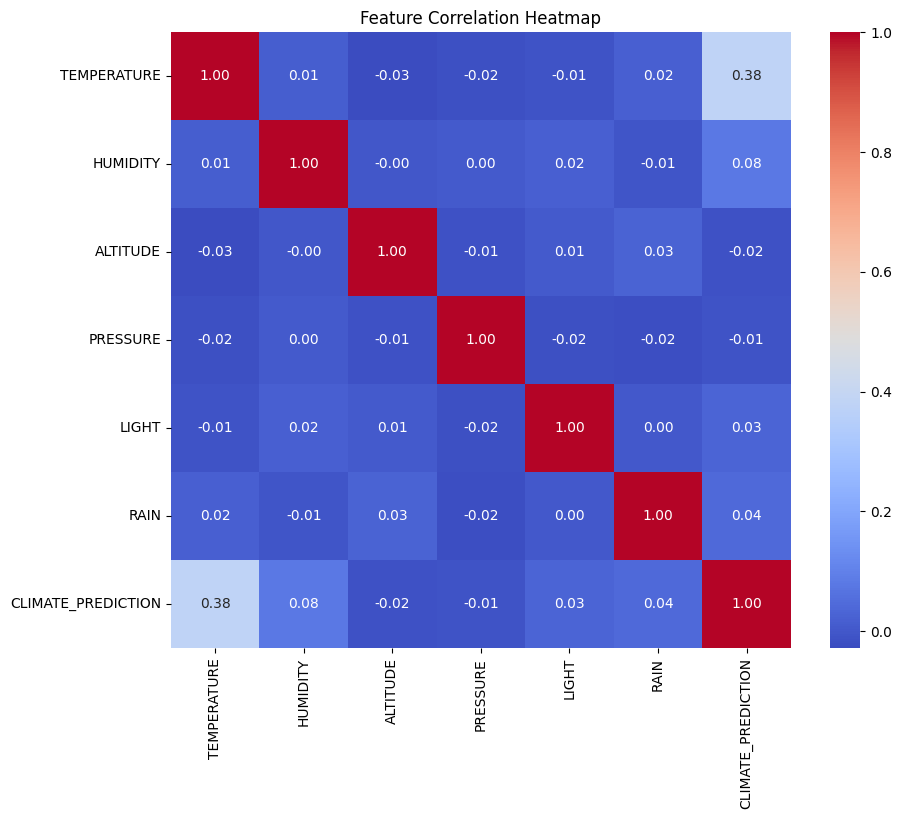

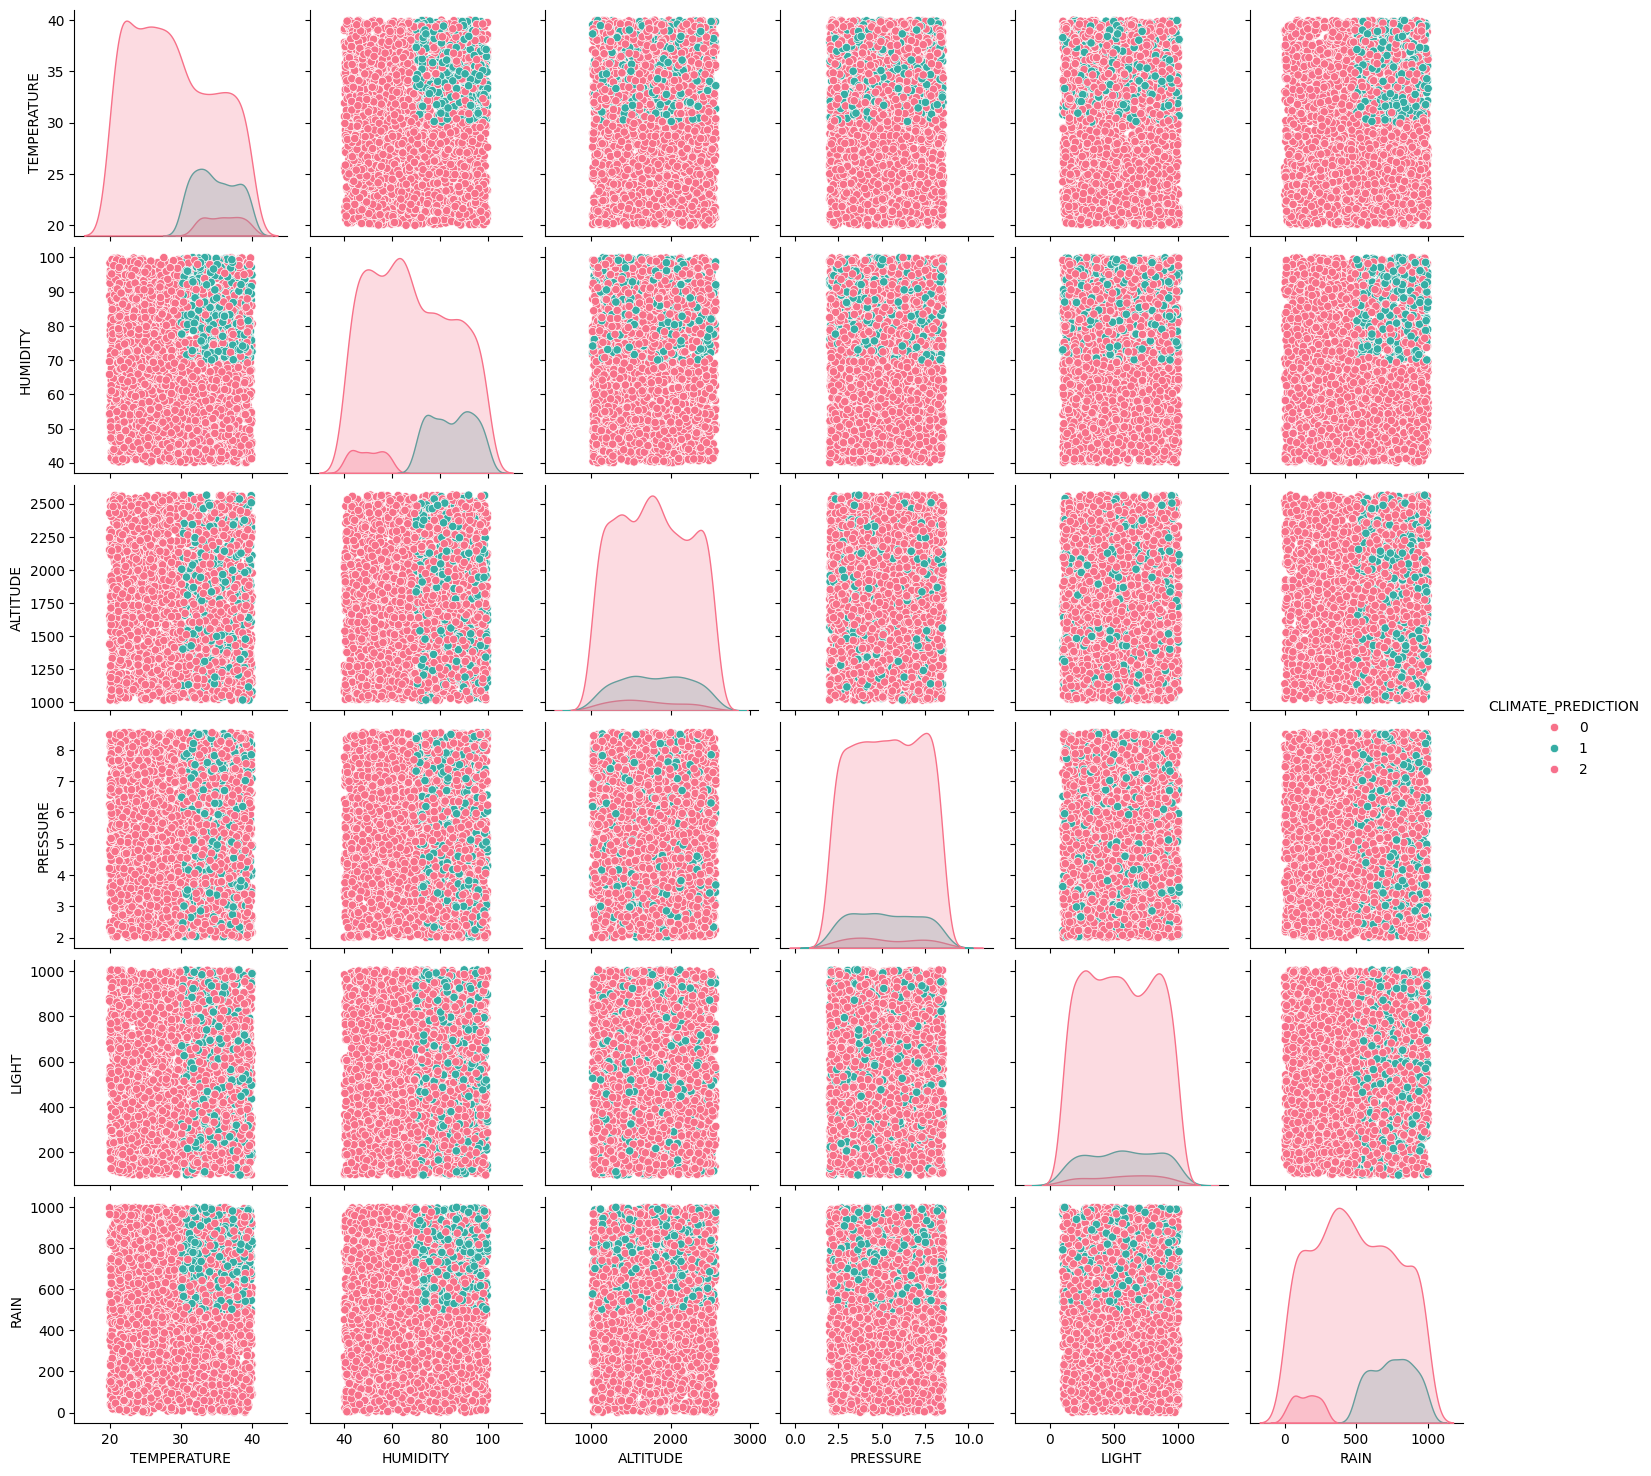

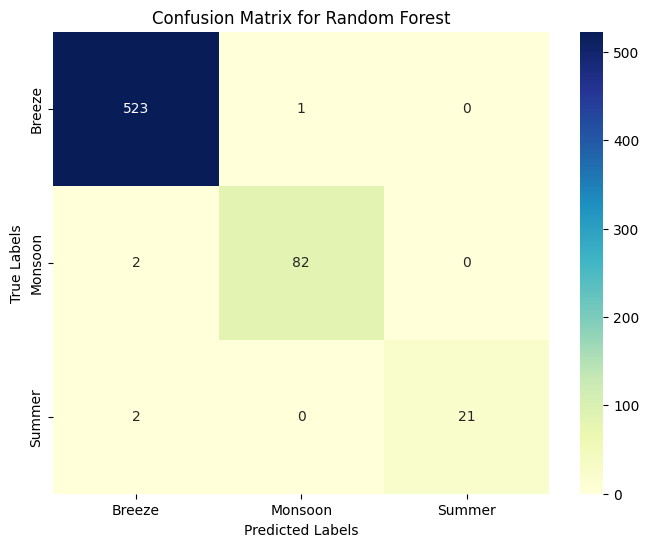

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 2522, number of used features: 6
[LightGBM] [Info] Start training from score -0.185976
[LightGBM] [Info] Start training from score -2.009762
[LightGBM] [Info] Start training from score -3.332998
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

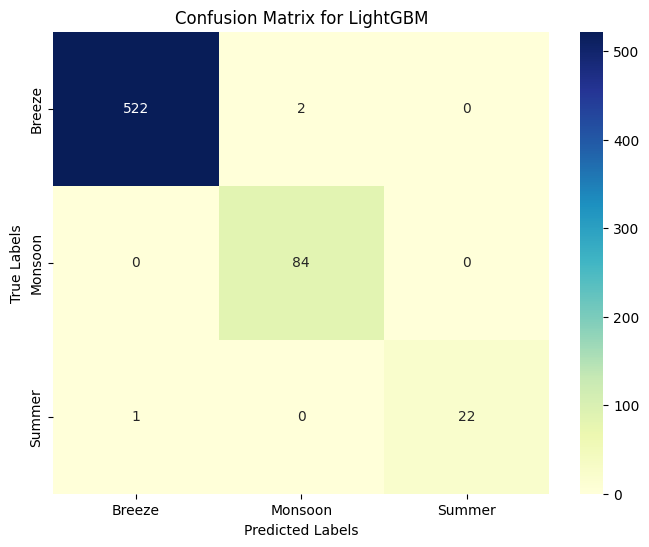

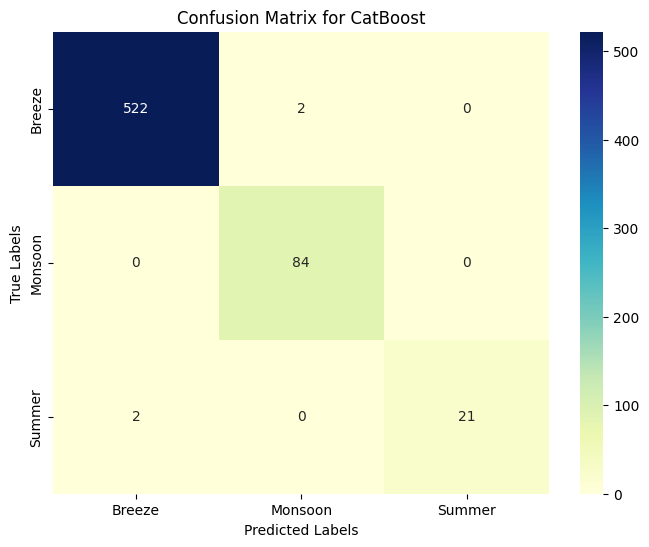

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-

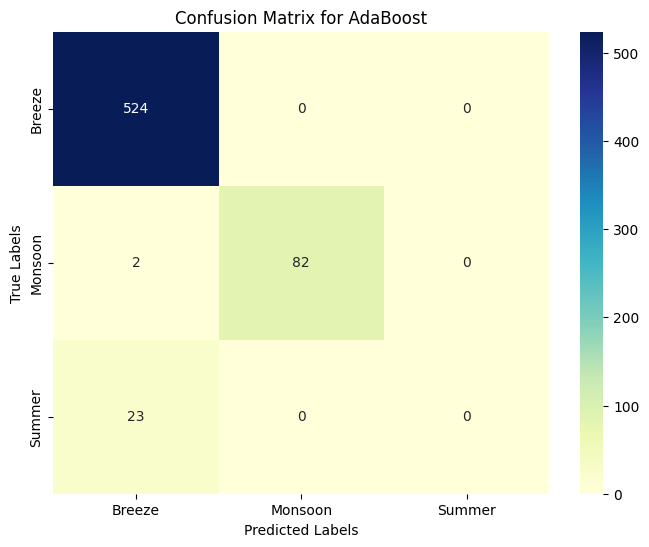

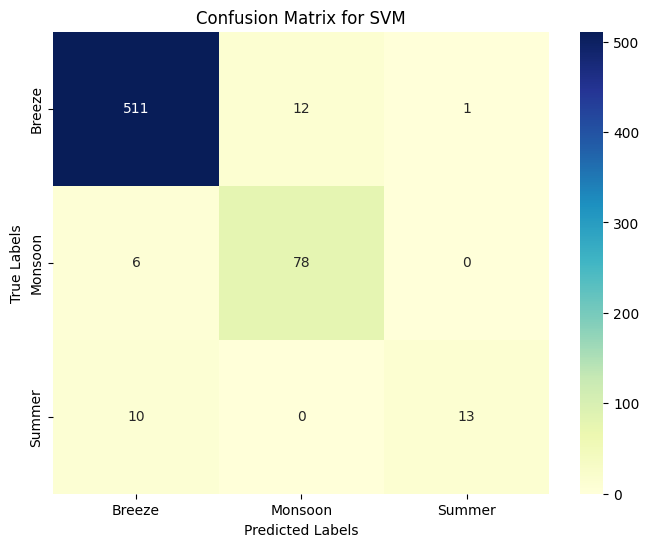

<ipython-input-6-365c9edc3128>:81: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=accuracies, palette="viridis")


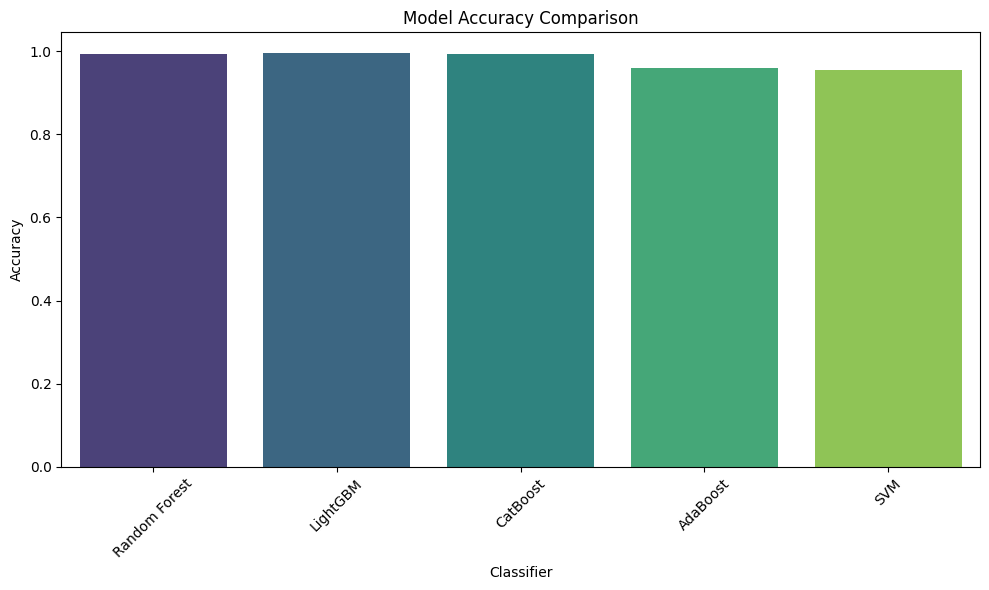

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Breeze       0.99      1.00      1.00       524
     Monsoon       0.99      0.98      0.98        84
      Summer       1.00      0.91      0.95        23

    accuracy                           0.99       631
   macro avg       0.99      0.96      0.98       631
weighted avg       0.99      0.99      0.99       631

Classification Report for LightGBM:
              precision    recall  f1-score   support

      Breeze       1.00      1.00      1.00       524
     Monsoon       0.98      1.00      0.99        84
      Summer       1.00      0.96      0.98        23

    accuracy                           1.00       631
   macro avg       0.99      0.98      0.99       631
weighted avg       1.00      1.00      1.00       631

Classification Report for CatBoost:
              precision    recall  f1-score   support

      Breeze       1.00      1.00      1.00       524
     Monsoon    

In [6]:
# Machine learning classification algorithms Random Forest LightGBM CatBoost AdaBoost SVM


# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/REAL_TIME WEATHER_DATA.csv'  # Update with your file path
weather_data = pd.read_csv(file_path)

# Encode the target variable
label_encoder = LabelEncoder()
weather_data['CLIMATE_PREDICTION'] = label_encoder.fit_transform(weather_data['CLIMATE_PREDICTION'])

# Explore the data - Heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(weather_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot to visualize feature distributions and pairwise relationships
sns.pairplot(weather_data, hue='CLIMATE_PREDICTION', palette="husl")
plt.show()

# Split data into features and target
X = weather_data.drop(columns=['CLIMATE_PREDICTION'])
y = weather_data['CLIMATE_PREDICTION']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Train models and evaluate performance
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        "accuracy": acc,
        "classification_report": classification_report(y_test, y_pred, target_names=label_encoder.classes_),
        "confusion_matrix": cm
    }

    # Plot confusion matrix for each model
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

# Compare model accuracies
plt.figure(figsize=(10, 6))
accuracies = [result["accuracy"] for result in results.values()]
sns.barplot(x=list(results.keys()), y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print classification reports for all models
for name, result in results.items():
    print(f"Classification Report for {name}:\n{result['classification_report']}")


Reduced feature dimensions: 6
Tuning Random Forest...


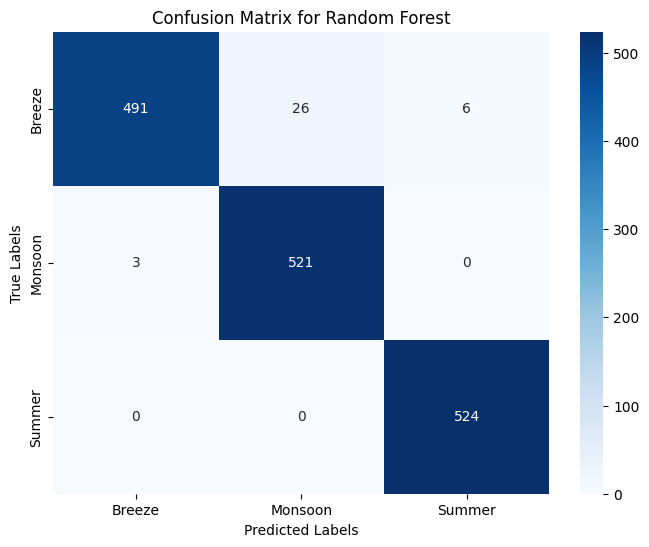

Tuning LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 6280, number of used features: 6
[LightGBM] [Info] Start training from score -1.098294
[LightGBM] [Info] Start training from score -1.098772
[LightGBM] [Info] Start training from score -1.098772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

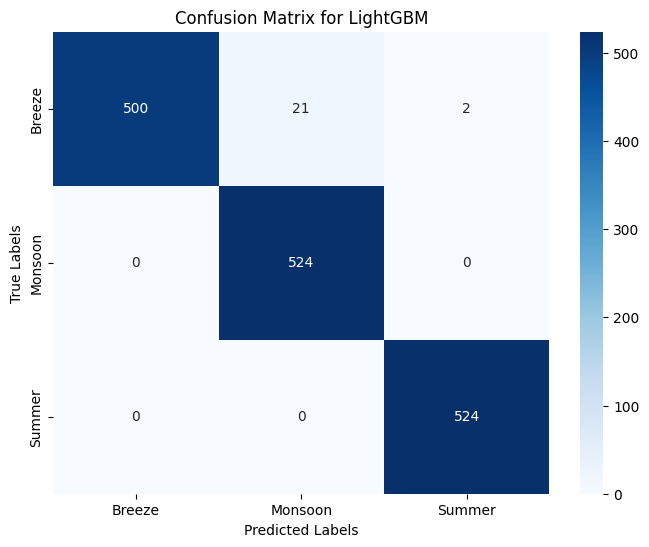

Tuning CatBoost...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


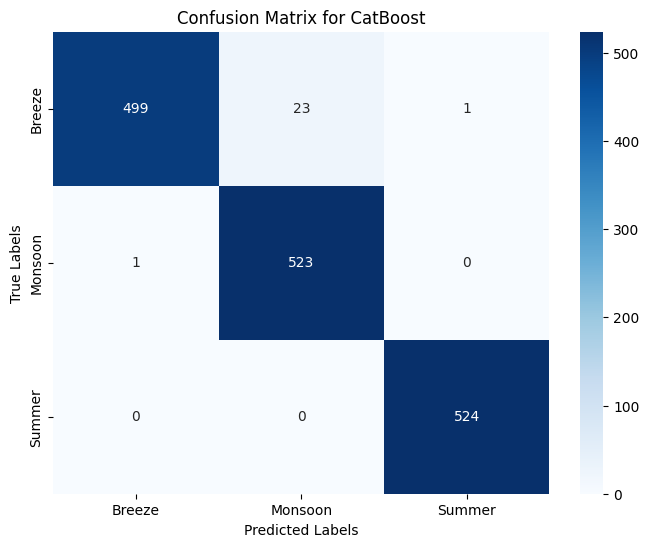

Tuning AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-

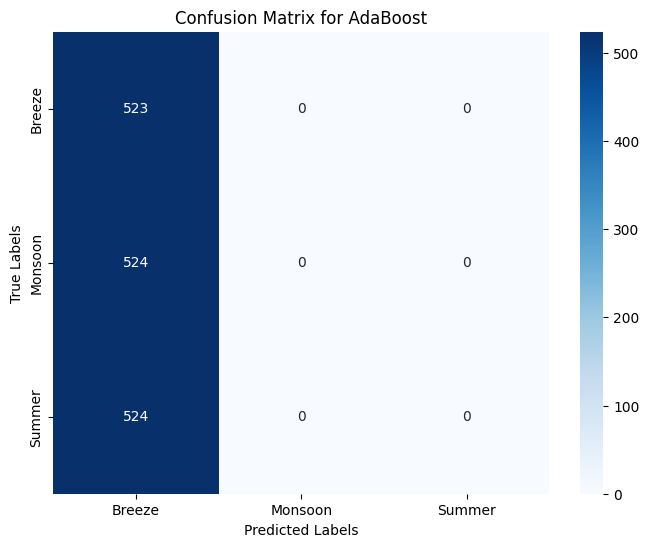

Tuning SVM...


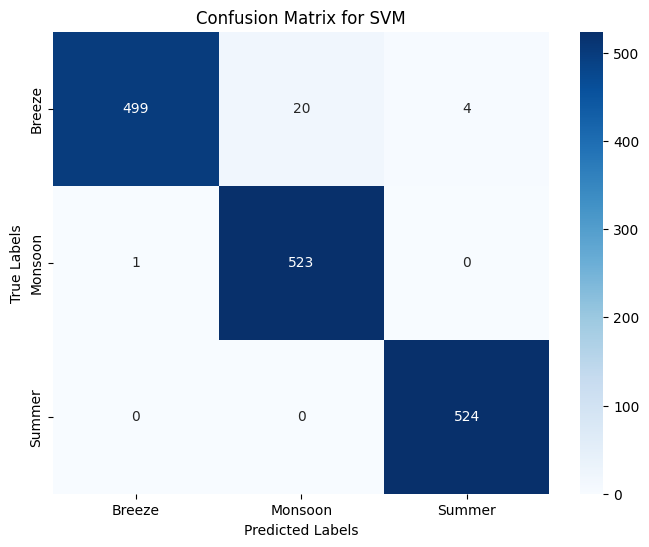

Tuning GradientBoosting...


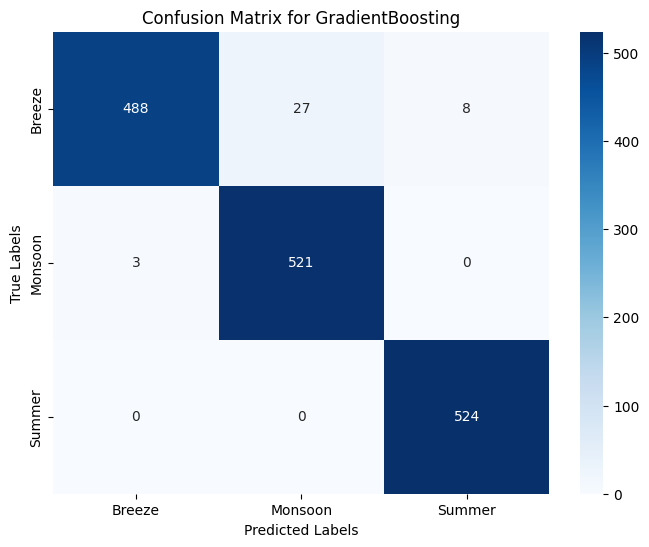

<ipython-input-7-9e1b30861962>:105: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tuned_results.keys()), y=accuracies, palette="viridis")


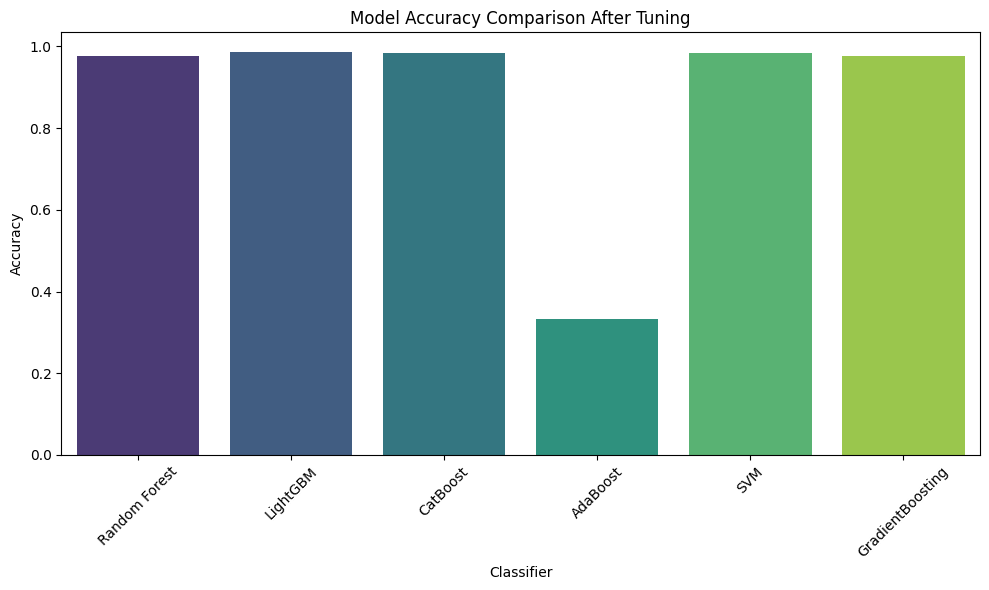

Classification Report for Random Forest:
              precision    recall  f1-score   support

      Breeze       0.99      0.94      0.97       523
     Monsoon       0.95      0.99      0.97       524
      Summer       0.99      1.00      0.99       524

    accuracy                           0.98      1571
   macro avg       0.98      0.98      0.98      1571
weighted avg       0.98      0.98      0.98      1571

Classification Report for LightGBM:
              precision    recall  f1-score   support

      Breeze       1.00      0.96      0.98       523
     Monsoon       0.96      1.00      0.98       524
      Summer       1.00      1.00      1.00       524

    accuracy                           0.99      1571
   macro avg       0.99      0.99      0.99      1571
weighted avg       0.99      0.99      0.99      1571

Classification Report for CatBoost:
              precision    recall  f1-score   support

      Breeze       1.00      0.95      0.98       523
     Monsoon    

In [7]:
# FEATURE SELECTION

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = '/content/REAL_TIME WEATHER_DATA.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Encode target variable
label_encoder = LabelEncoder()
data['CLIMATE_PREDICTION'] = label_encoder.fit_transform(data['CLIMATE_PREDICTION'])

# Feature engineering (e.g., interaction terms or aggregations)
data['temp_humidity'] = data['TEMPERATURE'] * data['HUMIDITY']
data['pressure_light'] = data['PRESSURE'] * data['LIGHT']

# Split features and target
X = data.drop(columns=['CLIMATE_PREDICTION'])
y = data['CLIMATE_PREDICTION']

# Handle outliers (z-score method)
z_scores = np.abs((X - X.mean()) / X.std())
X = X[(z_scores < 3).all(axis=1)]
y = y[X.index]  # Match target with filtered features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Apply PCA (optional)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_resampled)
print("Reduced feature dimensions:", X_pca.shape[1])

# Split train-test data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Define hyperparameter grids for tuning
param_grids = {
    "Random Forest": {"n_estimators": [100, 300], "max_depth": [10, 20, None]},
    "LightGBM": {"n_estimators": [100, 300], "learning_rate": [0.05, 0.1], "num_leaves": [31, 50]},
    "CatBoost": {"iterations": [200, 300], "learning_rate": [0.05, 0.1], "depth": [6, 8]},
    "AdaBoost": {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1]},
    "SVM": {"C": [1, 10], "kernel": ['linear', 'rbf']},
    "GradientBoosting": {"n_estimators": [100, 300], "learning_rate": [0.05, 0.1], "max_depth": [3, 5]}
}

# Perform hyperparameter tuning
tuned_results = {}
for name, model in models.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=StratifiedKFold(n_splits=5), scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    tuned_results[name] = {
        "best_model": best_model,
        "accuracy": acc,
        "classification_report": classification_report(y_test, y_pred, target_names=label_encoder.classes_),
        "confusion_matrix": cm
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {name}")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

# Compare tuned model accuracies
plt.figure(figsize=(10, 6))
accuracies = [result["accuracy"] for result in tuned_results.values()]
sns.barplot(x=list(tuned_results.keys()), y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison After Tuning")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display detailed classification reports
for name, result in tuned_results.items():
    print(f"Classification Report for {name}:\n{result['classification_report']}")



Class Distribution:
 CLIMATE_PREDICTION
0    2618
1     422
2     113
Name: count, dtype: int64
Reduced feature dimensions: 6
Tuning hyperparameters for Random Forest...


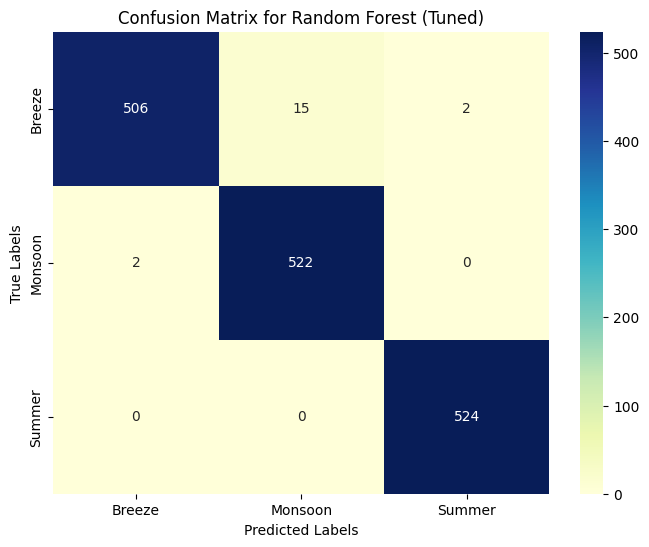

Tuning hyperparameters for LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 6283, number of used features: 6
[LightGBM] [Info] Start training from score -1.098294
[LightGBM] [Info] Start training from score -1.098771
[LightGBM] [Info] Start training from score -1.098771
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

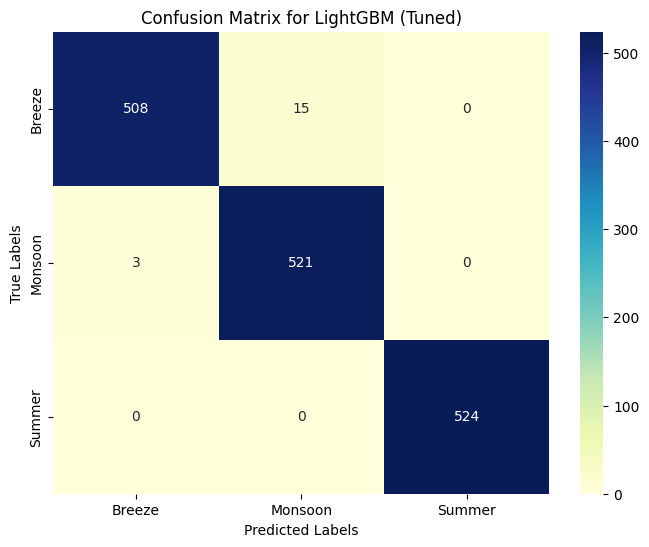

Tuning hyperparameters for CatBoost...


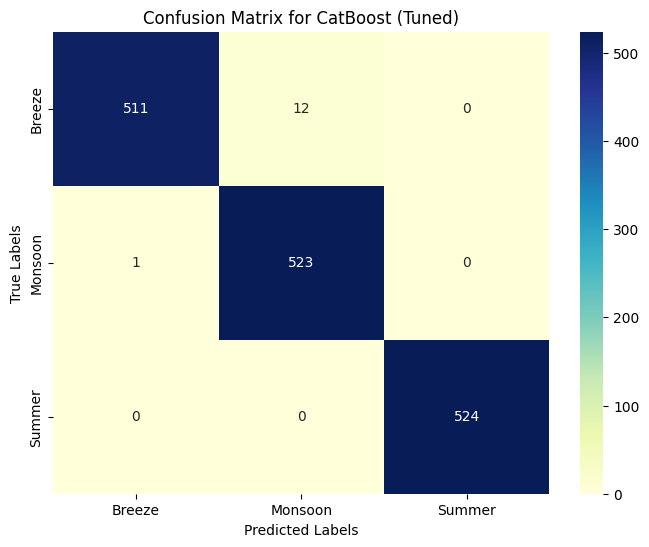

Tuning hyperparameters for AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


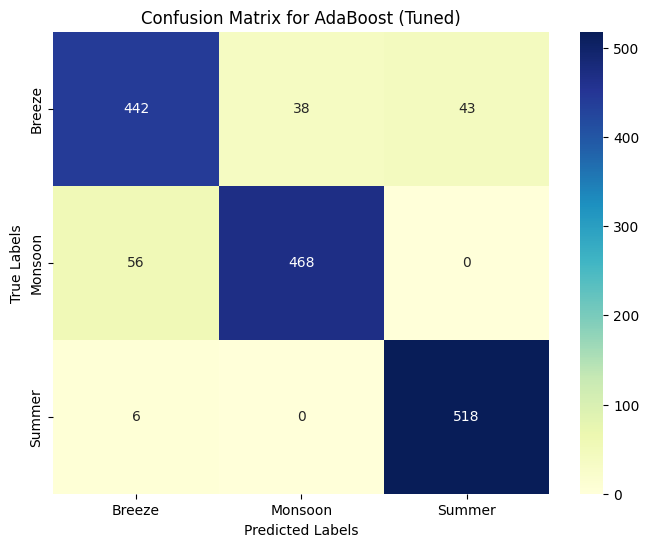

Tuning hyperparameters for SVM...


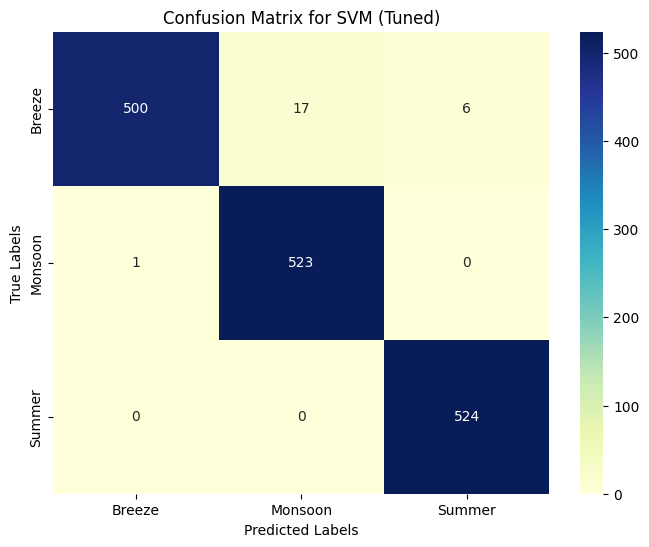

<ipython-input-8-06086c85b821>:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(tuned_results.keys()), y=accuracies, palette="viridis")


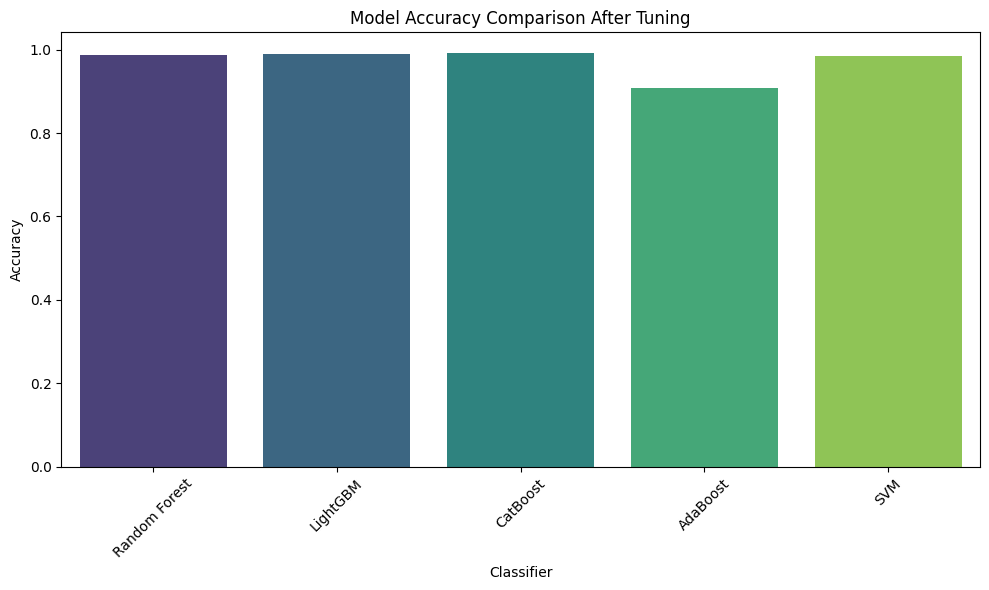

Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

      Breeze       1.00      0.97      0.98       523
     Monsoon       0.97      1.00      0.98       524
      Summer       1.00      1.00      1.00       524

    accuracy                           0.99      1571
   macro avg       0.99      0.99      0.99      1571
weighted avg       0.99      0.99      0.99      1571

Classification Report for LightGBM (Tuned):
              precision    recall  f1-score   support

      Breeze       0.99      0.97      0.98       523
     Monsoon       0.97      0.99      0.98       524
      Summer       1.00      1.00      1.00       524

    accuracy                           0.99      1571
   macro avg       0.99      0.99      0.99      1571
weighted avg       0.99      0.99      0.99      1571

Classification Report for CatBoost (Tuned):
              precision    recall  f1-score   support

      Breeze       1.00      0.98      0.99   

In [8]:
# FEATURE SELECTION

import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

# Load the dataset
file_path = '/content/REAL_TIME WEATHER_DATA.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Encode the target variable
label_encoder = LabelEncoder()
data['CLIMATE_PREDICTION'] = label_encoder.fit_transform(data['CLIMATE_PREDICTION'])

# Split data into features and target
X = data.drop(columns=['CLIMATE_PREDICTION'])
y = data['CLIMATE_PREDICTION']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check class distribution
class_counts = y.value_counts()
print("Class Distribution:\n", class_counts)

# Apply SMOTE if there's class imbalance
if class_counts.min() / class_counts.max() < 0.8:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
else:
    X_resampled, y_resampled = X_scaled, y

# Apply PCA for dimensionality reduction (optional, depending on variance explained)
pca = PCA(n_components=0.95)  # Retain 95% variance
X_pca = pca.fit_transform(X_resampled)
print("Reduced feature dimensions:", X_pca.shape[1])

# Split into train-test sets again
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

# Define hyperparameter grids for each model
param_grids = {
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [10, 20, None],
        "min_samples_split": [2, 5, 10]
    },
    "LightGBM": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.3],
        "num_leaves": [31, 50, 100]
    },
    "CatBoost": {
        "iterations": [100, 200, 300],
        "learning_rate": [0.01, 0.1, 0.3],
        "depth": [4, 6, 8]
    },
    "AdaBoost": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.3]
    },
    "SVM": {
        "C": [0.1, 1, 10],
        "kernel": ['linear', 'rbf', 'poly']
    }
}

# Tune hyperparameters and evaluate models
tuned_results = {}
for name, model in models.items():
    print(f"Tuning hyperparameters for {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=StratifiedKFold(n_splits=5), scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    tuned_results[name] = {
        "best_model": best_model,
        "accuracy": acc,
        "classification_report": classification_report(y_test, y_pred, target_names=label_encoder.classes_),
        "confusion_matrix": cm
    }

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu",
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix for {name} (Tuned)")
    plt.ylabel("True Labels")
    plt.xlabel("Predicted Labels")
    plt.show()

# Compare accuracies after tuning
plt.figure(figsize=(10, 6))
accuracies = [result["accuracy"] for result in tuned_results.values()]
sns.barplot(x=list(tuned_results.keys()), y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison After Tuning")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display tuned models' classification reports
for name, result in tuned_results.items():
    print(f"Classification Report for {name} (Tuned):\n{result['classification_report']}")
